In [2]:
import pandas as pd

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11176\4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df_data = pd.read_csv('../data/df_restaurante_review.csv')

In [3]:
# Config Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [4]:
df_data.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month,day,hour
0,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,NaN,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",oTTuahWNWzX_018P6O6_2g,z1Dfj8kz3KCArkXaIyaBIA,1.0,6,1,0,The worst Chicken Parm. Sandwich I've ever eat...,2014-05-25 21:52:30,2014,5,25,21
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,NaN,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",R7DC4sHDcklrk1s1K93FDA,HvgKiuV36e9SzNqeA5zOfA,4.0,0,0,0,"Zio's, previously known as Cesarina's is a lar...",2018-07-26 16:25:04,2018,7,26,16
2,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,NaN,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",8kDLAf-muASQfs5zDXpiyw,7BhiY0D84Lj04kjEWn5fIQ,5.0,0,0,0,"As an update to my previous review, we had tri...",2018-04-28 00:32:12,2018,4,28,0
3,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,NaN,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",KupYGAYqAKVLP9cspQ-9TQ,0EjWviHaYwdaMaD8VBOHWA,5.0,1,1,0,The little deli belongs in little Italy. Wonde...,2015-08-30 18:56:08,2015,8,30,18
4,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,NaN,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",hl4dIQIKphmMWH59WrO5-g,E47ejL3krT1wG8NvgtJDgw,4.0,2,1,1,Very good food for very good prices. I had the...,2011-10-28 20:06:00,2011,10,28,20


Se utilizará la columna 'text' para analizar y predecir si el resultado podría ser positivo o negativo. Se utilizará la biblioteca langdetect. Esta biblioteca permite detectar automáticamente el idioma de un texto dado.

In [5]:
#Se instala la librería langdetect con pip install.
!pip install langdetect


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


 -----------------------Se importa la función 'detect' desde la biblioteca langdetect para detectar el idioma deseado de un texto.

In [6]:
from langdetect import detect

------------ Se realiza una función para detectar las palabras en inglés y que eliminen las que no.-----------------------

In [7]:
def es_ingles(palabra): # Toma como parámetro una palabra y devuelve un valor booleano (V o F) sabiendo si es palabra en español e inglés.
    if not palabra:
        return False # Si la palabra está vacía o nula devuelve 'False'.
    try:
        idioma = detect(palabra)
        return idioma == 'en' # Si el idioma es inglés devuelve 'True'.
    except:
        return False  # Si la palabra tiene un error o no se procesa correctamente devuelve 'False'.

-------------- Se aplica la función en la base de datos y las palabras que no sean en inglés las reemplaza con '|'

In [8]:

# Eliminamos las palabras que no sean inglés
df_data['text'] = df_data['text'].apply(lambda palabra: '|' if not es_ingles(palabra) else palabra)

In [12]:
#verifico en Muestra aleatoria
df_data.sample(5)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,is_open,attributes,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date,year,month,day,hour
235152,_LOJW0XkOpj4O348GVRDeQ,Zavino,112 S 13th St,Philadelphia,FL,19107,39.949954,-75.162142,4.0,NaN,0,"{'HasTV': 'True', 'OutdoorSeating': 'True', 'B...","Italian, Wine Bars, Bars, Mediterranean, Pizza...","{'Monday': '11:30-23:0', 'Tuesday': '11:30-23:...",AebqbY7IimzXphgR0_L8Kw,uMXOs9Kmrp3CUCvB0eA1Zw,4.0,2,2,1,"This place is spot on, great pizza, they're do...",2011-03-21 04:32:57,2011,3,21,4
119786,-W0tnXYJ4WuxLjzmbwlVAQ,Tavolo V,6118 Delmar Blvd,Saint Louis,FL,63112,38.655158,-90.296835,4.0,NaN,0,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'f...","Mediterranean, Italian, Restaurants, Pizza","{'Monday': '17:0-21:0', 'Tuesday': '17:0-21:0'...",5RrkHLI47Ng8xcbI5sVz-g,6LMueBvjB5tVod-VojMi2A,2.0,0,0,0,We went last night very excited to try a new p...,2012-06-11 12:25:14,2012,6,11,12
188110,oysBCaEPjvxKcsufe0OeXA,Thai Bistro,5414 Main St,New Port Richey,FL,34652,28.249777,-82.724872,4.0,NaN,1,"{'RestaurantsReservations': 'True', 'Restauran...","Restaurants, Thai","{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",Fi0U8QUzSa3D-iwLujIF-A,YajvCToSwtoBelgnuiYoxg,5.0,0,0,0,Wife and I went here for the first time and I ...,2017-05-06 22:57:16,2017,5,6,22
57243,CxQ5GonUhGjgfX8REEFjdw,Yogi's Pizzeria,4825 Trousdale Dr,Nashville,FL,37220,36.075488,-86.760279,4.5,NaN,1,"{'RestaurantsDelivery': 'True', 'OutdoorSeatin...","Pizza, Ice Cream & Frozen Yogurt, Food, Restau...","{'Tuesday': '15:0-21:0', 'Wednesday': '15:0-21...",jjiByKCX5GLFZraZAVk6dQ,zJLofNR2MCbgtx5ey1V3Fw,5.0,1,0,0,Tasty pizza and delicious ice cream! We got th...,2021-07-02 14:08:12,2021,7,2,14
92115,6Z89Ixagyc0mrVnyZHiIVw,Catch Twenty Three,10103 Montague St,Tampa,FL,33626,28.043357,-82.597100,4.0,NaN,1,"{'BusinessParking': ""{'garage': False, 'street...","Restaurants, Latin American, Caribbean, Sushi ...","{'Monday': '0:0-0:0', 'Tuesday': '16:30-21:30'...",uOCwel9H-U4WPefcb4hnUQ,dnRQ1odYQ7xYne-qXDY8vA,3.0,1,0,1,I like the ambiance of this place- we sat outs...,2020-02-09 19:38:03,2020,2,9,19


-------------- Se elimina las filas que tienen el símbolo '|'.

In [13]:
df_data= df_data[df_data['text'] != '|']

In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823988 entries, 0 to 824899
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   823988 non-null  object 
 1   name          823988 non-null  object 
 2   address       822099 non-null  object 
 3   city          823988 non-null  object 
 4   state         823988 non-null  object 
 5   postal_code   823962 non-null  object 
 6   latitude      823988 non-null  float64
 7   longitude     823988 non-null  float64
 8   stars_x       823988 non-null  float64
 9   review_count  0 non-null       float64
 10  is_open       823988 non-null  int64  
 11  attributes    823221 non-null  object 
 12  categories    823988 non-null  object 
 13  hours         795871 non-null  object 
 14  review_id     823988 non-null  object 
 15  user_id       823988 non-null  object 
 16  stars_y       823988 non-null  float64
 17  useful        823988 non-null  int64  
 18  funny    

In [18]:
#limpio el dataset con columnas a utilizar
df_data_limpio = df_data[['business_id', 'user_id', 'review_id', 'stars_x', 'stars_y', 'useful', 'funny', 'cool', 'text', 'date']]

In [19]:
df_data_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 823988 entries, 0 to 824899
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  823988 non-null  object 
 1   user_id      823988 non-null  object 
 2   review_id    823988 non-null  object 
 3   stars_x      823988 non-null  float64
 4   stars_y      823988 non-null  float64
 5   useful       823988 non-null  int64  
 6   funny        823988 non-null  int64  
 7   cool         823988 non-null  int64  
 8   text         823988 non-null  object 
 9   date         823988 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.2+ MB


In [20]:
df_data_limpio.sample(5)

,business_id,user_id,review_id,stars_x,stars_y,useful,funny,cool,text,date
28270,qxDVtIq0EtvOtVKDwbYOiQ,S9zMHMOyCZCmmZW1bgWE-A,7uVqCyT_azuYLZkb6V0Nxw,2.5,3.0,2,3,2,"""Wow! We have a Tony Romas!?!"" said the man wh...",2014-09-05 14:15:42
139308,c_wrQJRAH478aAWJajPZ5g,nwsJ-upzjT2qKXyjc-ZAqQ,v2lxA-gd1DckcKSZeubkww,3.5,5.0,0,0,0,Great food. Wonderful pita. Stopped in for lun...,2018-12-28 22:36:26
795590,l5cKnwfmnaG4QRZl7ZyNuA,Ls0GZBCvaqvGDWzCy3IDig,AL3snvmI3fgWaWdUJtzDog,4.0,4.0,0,0,0,Diavolo pizza and arancini are outstanding. An...,2014-02-18 23:59:33
508403,q5AbgnNJdCEZBqImP3kOuw,xwUIk77LXi4Pa7LzNyLFTg,FomTVubhuSuUku8Cj3AULg,4.0,4.0,0,0,0,The food here was really good. We ate dinner h...,2019-07-15 20:44:00
185902,PRsj49qMOyW9fbztKrRglg,Kvr2ee_XgRMkrIf0HEy9Fw,b4ITxilRd31cowO_9RuyTg,3.5,4.0,1,0,0,I'm updating this review to add 1 star. When ...,2014-01-07 15:51:43


### DISPERCIÓN DE DATOS

Instalo la librería 'wordcloud' para poder visualizar las palabras repetidas.


In [7]:
!pip install wordcloud


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


Importo WorldCloud

In [8]:
from wordcloud import WordCloud

In [9]:
#Creo una variable text de la columna del dataframe para la visualización.

reviews = df_data_limpio['text']

In [10]:
#Uso WordCloud para la visualización de nube de palabras en una variable.
wordcloud = WordCloud(background_color="white", colormap='Dark2', max_font_size=150, random_state=42).generate(str(reviews))

In [11]:
#importo matplotlib.pyplot para graficar.
import matplotlib.pyplot as plt

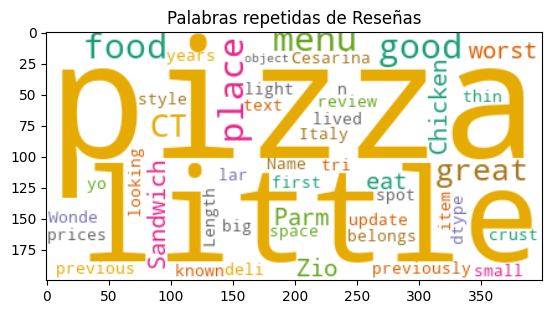

In [12]:
plt.imshow(wordcloud,interpolation='bilinear')
plt.title ('Palabras repetidas de Reseñas')
plt.show()

Se usa el paquete 'nltk' de Natural Language Toolkit que procesa el leguaje natural.

In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
from nltk import word_tokenize
nltk.download('vader_lexicon') # Descarga vader_lexicon para el análisis de sentimientos.
nltk.download('punkt') # Descarga punkt, un modelo de toquenización que divide el texto en palabras individuales

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [16]:
#Creo una variable para que inicie el analizador de sentimientos VADER.
analizador = SentimentIntensityAnalyzer()

In [17]:
#Creo una función para obtener el puntaje del sentimiento entre los valores (1 y -1), donde 1 es positivo y -1 es negativo.
def Puntaje_Sentimiento(text):
    tokens = word_tokenize(text)  # Tokenizar el texto
    scores = analizador.polarity_scores(text)  # Obtener los puntajes de sentimiento
    return scores['compound']  # Retornar el puntaje compuesto

In [19]:
#Se aplica la función 'Puntaje_Sentimiento' en el dataframe.
df_data_limpio['score_sentimientos'] = df_data_limpio['text'].apply(Puntaje_Sentimiento)

In [20]:
#verifico
df_data_limpio.sample(5)

,business_id,user_id,review_id,stars_x,stars_y,useful,funny,cool,text,date,score_sentimientos
4181,SSZDGl2J-CEyIzuIbEiYNQ,xYgdYioZpHUxApiddFhCxg,yqSjIsFgLRumrcUVyXKBRQ,3.0,3.0,1,2,1,Stopped in for lunch at the suggestion of a co...,2013-10-12 02:31:32,0.9089
525066,e1P-sfC54cO7WoAYRXvBxA,Rue42Zud1Ieu1ORFs_xigg,ZyMn2Wa_EZr0fMmKDmgUmA,4.0,5.0,4,0,0,After a year of trying to get there for brunch...,2018-02-25 20:35:24,0.9689
269126,6SYG6M05gIwaj3doas6X9Q,ZsURx8o6zvqS7A9iNBOB9g,ysZa6LFrrYC2665QSn-hbg,4.0,5.0,0,0,0,This is my favorite place in town to get a bob...,2020-05-12 17:50:45,0.9601
667227,pT9Zvlj2OnprVu6RoPys9g,jn0IlshjEmN3R8vPJOo8uw,FKR4t7FKRZXquhSXtKJsAw,4.5,5.0,1,0,0,First time at the ( very close to my house) ne...,2021-10-07 23:09:31,0.9732
720683,JO76ifyAiBiRPNx_3S0jNQ,MgrXidHmT4ckz5n7iSTorQ,q84Rwgi7VJbhj_y7OHRViA,3.0,2.0,0,1,0,Husband and friend went here while we shopped ...,2016-05-09 16:48:04,0.7574


#### Metricas y estadisticas

In [22]:
#Tamaño de dataset
df_data_limpio.shape

(824900, 11)

In [21]:
#Metricas de los valores cuantitativos 

,stars_x,stars_y,useful,funny,cool,score_sentimientos
count,824900.000000,824900.000000,824900.000000,824900.000000,824900.000000,824900.000000
mean,3.789865,3.788927,1.003980,0.310267,0.493522,0.674290
std,0.615875,1.388670,3.503151,2.113664,2.993228,0.527606
min,1.000000,1.000000,0.000000,0.000000,0.000000,-0.999300
25%,3.500000,3.000000,0.000000,0.000000,0.000000,0.701675
50%,4.000000,4.000000,0.000000,0.000000,0.000000,0.921500
75%,4.000000,5.000000,1.000000,0.000000,0.000000,0.971500
max,5.000000,5.000000,404.000000,361.000000,404.000000,0.999900


In [23]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
#Importo
import seaborn as sns
import matplotlib.pyplot as plt

Utilizo pairplot de seaborn para observar la correlación en forma de distribución normal entre los datos cuantitativos.

c:\Users\Usuario\Desktop\Proyectos\PF_Google_Yelp\proy_final\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


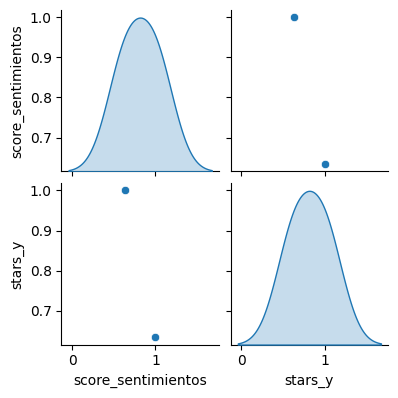

In [25]:
# Seleccionar las columnas deseadas en una lista
columns = ['score_sentimientos','stars_y']
# Obtener el DataFrame con las columnas seleccionadas
selected_df = df_data_limpio[columns]

# Calcular la matriz de correlación
correlation_data = selected_df.corr()

# Crear el pairplot
sns.pairplot(correlation_data, diag_kind='kde', size=2)

Utilizo heatmap de seaborn para observar la correlación en forma de mapa de calor con datos numéricos entre los datos cuantitativos.

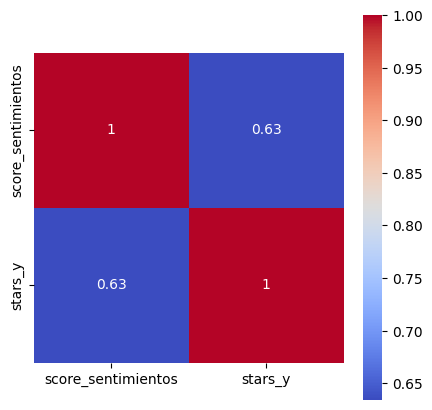

In [26]:
# Se crea una figura con tamaño 5x5
plt.figure(figsize=(5,5))

# Se genera el mapa de calor con las correlaciones
sns.heatmap(selected_df.corr(), annot=True, square=True, cmap='coolwarm')

# Se genera la visualización del mapa de calor
plt.show()

Ingreso los valores negativos -1, neutros 0 y positivos en 1

In [27]:
# Se agrega una columna para la categorización.
df_data_limpio['categorizacion'] = df_data_limpio['score_sentimientos'].apply(lambda x: 1 if x > 0 else -1)

In [32]:
df_data_limpio.sample(5)


,business_id,user_id,review_id,stars_x,stars_y,useful,funny,cool,text,date,score_sentimientos,categorizacion
423143,oskXqC-K0AFLtgbTA4D3gQ,-pmlSr4Hetesw4sSxu5H7g,-PWQGpwAfdyvOzqUx4UWFw,4.0,5.0,0,0,0,Best drunken noodles I have ever had and great...,2018-08-30 09:41:46,0.9336,1
686809,HHw5qSiNj8cwdy5cGAqMzQ,-Lzb8L4gQ67lcXMRg5PRGw,gq0X-KSqLHzlHTEw1XdQ9g,3.0,1.0,1,0,0,2nd time here under new name and to try their ...,2018-06-28 18:17:32,-0.7556,-1
56131,RK93mcFftFbN2UN7JXBp6Q,ZgjHJPi76jZ8RPhpzWuOPw,fiAZfIrNmTmP2wUSTCfBFw,2.5,1.0,0,0,0,Walked in there were about 10 people at the ba...,2018-03-14 03:17:46,-0.9582,-1
606801,ac1AeYqs8Z4_e2X5M3if2A,L71P0y07gvvR9AlljOWFVQ,eLbpzBWorb52Y9YN5tZ04g,4.0,5.0,0,0,0,The BEST meal I've ever had! I had grilled oys...,2014-07-30 15:22:28,0.9672,1
787206,zS_iBFOBbZSNC1edaijD3A,p6sURh18VJ3E4xrp-I5R1Q,J47CM38BosoHifrvf9XFmw,3.5,5.0,2,0,1,"The rice, beef, lettuce, and tomatoes are alwa...",2018-08-01 21:38:43,0.5859,1


Revisamos si se clasificó debidamente el texto

In [33]:
df_data_limpio['text'][1000]

"Excellent experience for a very late lunch.\nGreat server Justin, special rolls spot on and the tuna sundae super. We are old timers at Bluefin in Norristown, quality seems as good. If you don't mind paying top dollar for top food and service, this is a great choice."

In [34]:
#Contador de cantidad de textos clasificados con los valores únicos
df_data_limpio['categorizacion'].value_counts()


categorizacion
 1    715227
-1    109673
Name: count, dtype: int64

Observamos en un histograma la dispersión de los valores

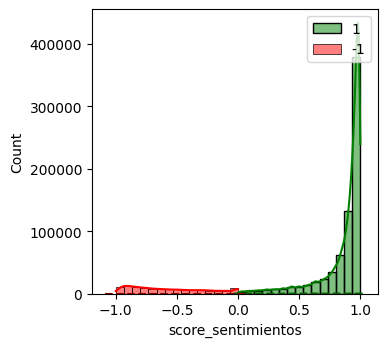

In [36]:
# Se define el número de contenedores en los histogramas
bins = 15

# Se crea una figura con tamaño 10x10
plt.figure(figsize=(10, 10))

#Se crea un subgráfico para que se observen los histogramas
plt.subplot(3, 3, 1)

# Se utiliza hisplot de seaborn para graficar los histogramas por variable
sns.histplot(df_data_limpio[df_data_limpio['categorizacion'] == 0]['score_sentimientos'], bins=bins, color='yellow', label='0', kde=True)

# Se utiliza kdeplot de seaborn para trazar la distribución normal por variable
sns.kdeplot(df_data_limpio[df_data_limpio['categorizacion'] == 0]['score_sentimientos'], color='darkyellow', linestyle='--')

sns.histplot(df_data_limpio[df_data_limpio['categorizacion'] == 1]['score_sentimientos'], bins=bins, color='green', label='1', kde=True)
sns.kdeplot(df_data_limpio[df_data_limpio['categorizacion'] == 1]['score_sentimientos'], color='darkgreen', linestyle='--')

sns.histplot(df_data_limpio[df_data_limpio['categorizacion'] == -1]['score_sentimientos'], bins=bins, color='red', label='-1', kde=True)
sns.kdeplot(df_data_limpio[df_data_limpio['categorizacion'] == -1]['score_sentimientos'], color='darkred', linestyle='--')
# Muestra la leyenda
plt.legend(loc='upper right')

# Ajusta los subgrpaficos y los espacios para un mejor diseño
plt.tight_layout()

# Muestra el gráfico generado
plt.show()

Guardo archivo

In [37]:
df_data_limpio.to_csv('../data/df_modelo.csv', index=False)

### Modelo de Regresion Logistica


In [38]:
#Variables X e Y
X = df_data_limpio.score_sentimientos
# Y será la variable categorizacion que contiene:
# 1= buen comentario -- = -1mal comentario
y = df_data_limpio.categorizacion

In [39]:
#Se instala la librería skitlearn para utilizar las regresiones
!pip install scikit-learn

                                              0.0/10.6 MB ? eta -:--:--
                                              0.2/10.6 MB 5.0 MB/s eta 0:00:03
     --                                       0.8/10.6 MB 8.0 MB/s eta 0:00:02
     ------                                   1.6/10.6 MB 12.8 MB/s eta 0:00:01
     ------------                             3.3/10.6 MB 17.4 MB/s eta 0:00:01
     ------------------                       5.0/10.6 MB 21.4 MB/s eta 0:00:01
     ------------------------                 6.4/10.6 MB 24.2 MB/s eta 0:00:01
     -------------------------------          8.3/10.6 MB 26.7 MB/s eta 0:00:01
     -------------------------------------    9.9/10.6 MB 28.7 MB/s eta 0:00:01
     --------------------------------------  10.6/10.6 MB 32.7 MB/s eta 0:00:01
     --------------------------------------- 10.6/10.6 MB 29.7 MB/s eta 0:00:00
                                              0.0/46.2 MB ? eta -:--:--
     -                                        1.4/46.2 MB 


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Implementación de la regresión logística desde sklearn


In [40]:
## Implementamos la regresión logística
from sklearn.model_selection import train_test_split

In [41]:
#Se separan los datos en "train" datos entrenados y "test" datos de prueba
# Se usará el 20% de estos datos para la prueba
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [42]:
#Se escalan los datos para que todos tengan la misma medida o magnitud.
from sklearn.preprocessing import StandardScaler

escalar = StandardScaler()
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [43]:
#Se define el algoritmo a usar, en este caso por los tipos de datos en clasificación, se usará la REGRESIÓ LOGÍSTICA
from sklearn.linear_model import LogisticRegression
algoritmo =LogisticRegression()
# Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [44]:
#Realizamos una predicción de los datos a prueba (estos siempre son aleatorios por default)
y_pred=algoritmo.predict(X_test)
# Se muestran los datos predichos
y_pred

array([ 1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [45]:
# Se muestran los datos reales
y_test

198275    1
442278   -1
636337    1
347254    1
481721    1
         ..
49847     1
91945     1
382135    1
730757    1
464315    1
Name: categorizacion, Length: 164980, dtype: int64

Se utiliziará la Matriz de confusión para evaluar y analizar el rendimiento de un modelo de clasificación al mostrar la concordancia entre las etiquetas de clase reales y las etiquetas de clase predichas.


In [46]:
# Se importa la matriz confusión de sklearn
from sklearn.metrics import confusion_matrix

In [47]:
matriz=confusion_matrix(y_test,y_pred)
print('Matriz de confusión:', matriz) # Solo se evalúa un 20% de los datos

Matriz de confusión: [[ 21912      0]
 [   155 142913]]


In [48]:
#Se utiliza SVC de sklearn para saber las probabilidades de las clasificaciones de los datos según el modelo aplicado
from sklearn.svm import SVC

In [49]:
import numpy as np

In [50]:
# Crear un estimador SVC
algoritmo2= SVC(probability=True)

# Ajustar el estimador a los datos de entrenamiento
algoritmo2.fit(X_train, y_train)

# Obtener las probabilidades de predicción para los datos de prueba
probas = algoritmo2.predict_proba(X_test)

print((np.round(probas,decimals=5)))

[[0. 1.]
 [1. 0.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [51]:
#Se usa GaussianNaiveBayes para que ausma una distribución normal para conocer la precisión de la predicción de las variables entrenadas y de prueba
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB().fit(X_train, y_train)
predicted = nbclf.predict(X_test)
print('Análisis de predicción de sentimientos de los comentarios')
print('Precisión del clasificador GaussianNB en el conjunto de entrenamiento: {:.2f}'.format(nbclf.score(X_train, y_train)))
print('Precisión del clasificador GaussianNB en el conjunto de prueba: {:.2f}'.format(nbclf.score(X_test, y_test)))

Análisis de predicción de sentimientos de los comentarios
Precisión del clasificador GaussianNB en el conjunto de entrenamiento: 0.98
Precisión del clasificador GaussianNB en el conjunto de prueba: 0.98


In [52]:
#Se usa Metrics para evaluar y comparar el desempeño del modelo, en este caso, utilizaremos las del tipo clasificación por los tipos de datos
from sklearn import metrics

print("Informe de clasificación para clasificador %s:\n%s\n"
      % (nbclf, metrics.classification_report(y_test, predicted)))

Informe de clasificación para clasificador GaussianNB():
              precision    recall  f1-score   support

          -1       0.88      1.00      0.94     21912
           1       1.00      0.98      0.99    143068

    accuracy                           0.98    164980
   macro avg       0.94      0.99      0.96    164980
weighted avg       0.98      0.98      0.98    164980


